In [27]:
import random
import numpy as np
import pickle
import matplotlib.pyplot as plt 

In [28]:
def init(n_chromosome=30, D=10):
    population = []
    for _ in range(n_chromosome):
        chromosome = [random.random()*60-30 for _ in range(D)]
        population.append(chromosome)
    return population

def get_fitness(population):
    fitness = []
    for chromosome in population:
        total = 0
        for i in range(len(chromosome)-1):
            total += 100*((chromosome[i]-chromosome[i+1])**2)+(1-chromosome[i])**2
        fitness.append(total)
    return fitness

def select_parent(population, fitness, n_parent=2):    
    # weighted roulette wheel
    fitness_inverse = 1/np.array(fitness)
    selection_probs = np.array(fitness_inverse)/sum(fitness_inverse)
    selected_idx = np.random.choice(len(population), p=selection_probs, size=n_parent, replace=False)
    parents = [population[i] for i in selected_idx]
    return parents

def crossover(parents, crossover_rate=0.5, n_children=30):
    childrens = []
    while len(childrens) < n_children:
        idx = np.random.choice(len(parents), size=2, replace=False)
        parent_1 = parents[idx[0]]
        parent_2 = parents[idx[1]]
        if random.random() < crossover_rate:
            children_1 = parent_1[:5] + parent_2[5:]
            children_2 = parent_2[:5] + parent_1[5:]
            childrens.append(children_1)
            childrens.append(children_2)
        else:
            children_1 = parent_1[:]
            children_2 = parent_2[:]
            childrens.append(children_1)
            childrens.append(children_2)
    return childrens

def mutation(cross, mutation_rate=0.1):
    childrens = pickle.loads(pickle.dumps(cross))
    for chromosome in childrens:
        for i in range(len(chromosome)):
            if random.random() < mutation_rate:
                change = (random.random()*2)-1.0
                chromosome[i] += change
                if chromosome[i] < 0:
                    chromosome[i] = 0
                elif chromosome[i] > 30:
                    chromosome[i] = 30
    return childrens                   

In [21]:
average_fitness = []
max_fitness = []
min_fitness = []
n_iteration = 10000
population = init(n_chromosome=100, D=10)
for iteration in range(n_iteration):
    fitness = get_fitness(population)
    parents = select_parent(population, fitness, n_parent=10)
    cross = crossover(parents, n_children=100)
    #print(fitness)
    population = mutation(cross, mutation_rate=0.1)
    average_fitness.append(sum(fitness) / len(fitness))
    max_fitness.append(max(fitness))
    min_fitness.append(min(fitness))
    #print(iteration)

In [37]:
rounds = 10
min_all_rounds = []
for round_ in range(rounds):
    average_fitness = []
    max_fitness = []
    min_fitness = []
    n_iteration = 1000
    population = init(n_chromosome=100, D=30)
    for iteration in range(n_iteration):
        fitness = get_fitness(population)
        parents = select_parent(population, fitness, n_parent=10)
        cross = crossover(parents, n_children=100)
        #print(fitness)
        population = mutation(cross, mutation_rate=0.1)
        average_fitness.append(sum(fitness) / len(fitness))
        max_fitness.append(max(fitness))
        min_fitness.append(min(fitness))
        #print(iteration)
    min_all_rounds.append(min(min_fitness))
    print(round_)

0
1
2
3
4
5
6
7
8
9


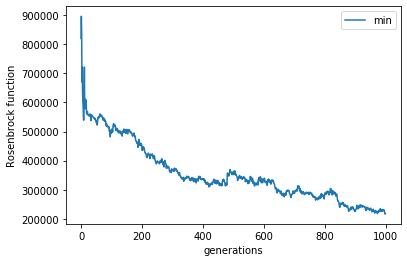

In [38]:
#plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')

plt.legend()

In [39]:
min_all_rounds

[131903.23232127598,
 33650.14492706914,
 57777.800931774436,
 54218.73737403596,
 23130.241401581814,
 42483.51258648515,
 253680.55406032488,
 71715.05216039813,
 112307.21127958178,
 217129.96103748737]

In [20]:
min(min_fitness)

1260.2947486331427

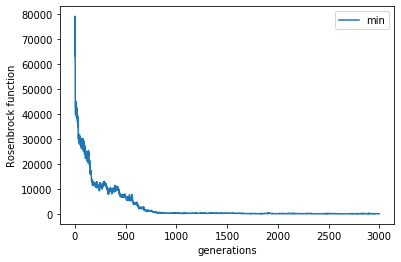

In [16]:
#plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')

plt.legend()


In [17]:
min(min_fitness)

103.86107732271338

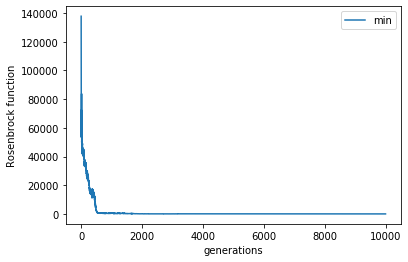

In [22]:
#plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')

plt.legend()

In [23]:
min(min_fitness)

2.121735380144245

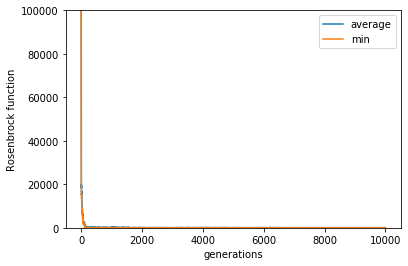

In [17]:
plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')
plt.ylim(0, 100000)
plt.legend()

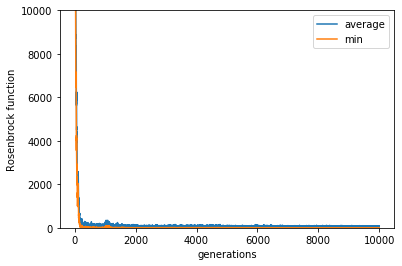

In [18]:
plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')
plt.ylim(0, 10000)
plt.legend()

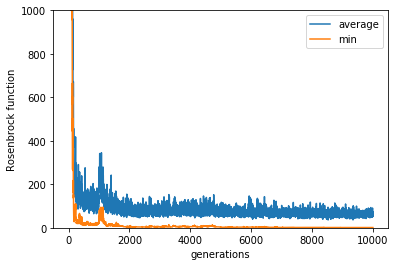

In [19]:
plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')
plt.ylim(0, 1000)
plt.legend()

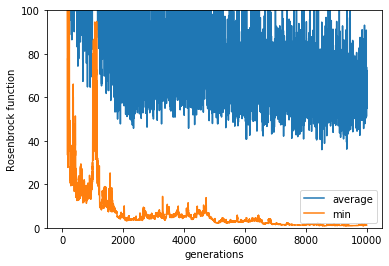

In [22]:
plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')
plt.ylim(0, 100)
plt.legend()

In [21]:
min(min_fitness)

0.8818956378488088

# try 100000 generations

In [23]:
average_fitness = []
max_fitness = []
min_fitness = []
n_iteration = 100000
population = init(n_chromosome=100)
for iteration in range(n_iteration):
    fitness = get_fitness(population)
    parents = select_parent(population, fitness, n_parent=10)
    cross = crossover(parents, n_children=100)
    population = mutation(cross, mutation_rate=0.1)
    average_fitness.append(sum(fitness) / len(fitness))
    max_fitness.append(max(fitness))
    min_fitness.append(min(fitness))

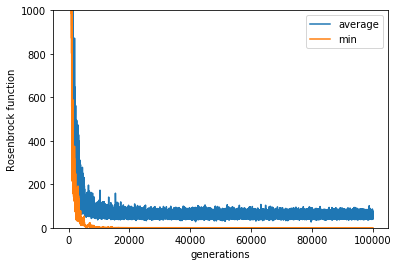

In [24]:
plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')
plt.ylim(0, 1000)
plt.legend()

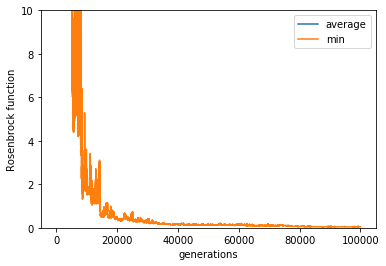

In [25]:
plt.plot(average_fitness, label="average")
plt.plot(min_fitness, label="min")
plt.xlabel('generations')
plt.ylabel('Rosenbrock function')
plt.ylim(0, 10)
plt.legend()

In [26]:
min(min_fitness)

0.036964818165400065

In [27]:
population

[[1.0516105326639282,
  0.7729190649509965,
  1.058540650605835,
  1.9075508691428629,
  1.0686436956585086,
  0.35676556160842643,
  1.061178753806461,
  1.0580277979852637,
  1.0582587127282028,
  1.0625681480107994],
 [1.0516105326639282,
  1.0542674788507425,
  1.058540650605835,
  1.0645522834152394,
  1.0686436956585086,
  1.0644257242409776,
  1.061178753806461,
  1.0580277979852637,
  1.0582587127282028,
  1.0625681480107994],
 [1.0516105326639282,
  1.0542674788507425,
  1.058540650605835,
  1.0645522834152394,
  1.0686436956585086,
  1.0644257242409776,
  1.061178753806461,
  1.828457968335136,
  1.0582587127282028,
  1.0625681480107994],
 [1.0516105326639282,
  1.0542674788507425,
  1.1278531986352016,
  1.0645522834152394,
  1.0686436956585086,
  1.0644257242409776,
  1.061178753806461,
  1.0580277979852637,
  1.079736779483256,
  1.0625681480107994],
 [1.0516105326639282,
  1.0542674788507425,
  1.058540650605835,
  1.0645522834152394,
  1.0686436956585086,
  1.06442572424